In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
sns.set_theme(style="whitegrid")

In [12]:
df = pd.read_csv('data.csv')
df.head()

,Name,Brewery,Adam,Dad,Alan,Dave,Fi,Average,Std,Style,Abv,Hops,Grains,IBU
0,Swan Gold,Swan,6.5,7.5,8.0,6.0,7.5,7.1,0.82,Golden Ale,4.0%,Admiral;Saaz;Styrian Goldings,Pale Malt; Wheat; Crystal,NaN
1,Winter Swanerland,Swan,5.0,5.0,6.0,7.0,7.0,6.0,1.00,Ruby Ale,4.8%,First Gold;Endeavour,Pale Maris Otter; Crystal; Wheat; Chocolate.,NaN
2,Mutation IPA,Swan,6.0,5.5,5.0,8.0,6.5,6.2,1.15,IPA,5.5%,Pilgrim;Citra;Comet,Pale Malt; Wheat; Crystal,NaN
3,Arm Breaker,Swan,3.0,4.5,5.0,6.0,5.0,4.7,1.10,IPA,6.0%,Goldings;Admiral,Pale; Wheat; Crystal,NaN
4,Black Swan,Swan,6.0,4.0,4.0,8.5,9.0,6.3,2.39,Stout,4.5%,First Gold,Chocolate; Crystal; Pale Malts; Roasted Barley...,NaN


Normalise Induvidual Rating

In [13]:
names = ['Adam', 'Dad', 'Alan', 'Dave', 'Fi']
for name in names:
    x = df[name].values.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    x_scaled = np.subtract(x_scaled, np.mean(x_scaled)-0.5)
    df[name] = x_scaled*10

In [14]:
dfb = df.copy()
dfb.drop(['Std', 'Abv', 'IBU'], axis=1, inplace=True)
df['Average'] = dfb.mean(numeric_only=True, axis=1)
df['Std'] = dfb.std(numeric_only=True, axis=1)

Calculate best brewries

In [15]:
dictionary = {}
for i, b in enumerate(df['Name'].unique()):
    key = str(b) + '\n' + str(df.loc[df['Name'] == b]['Brewery'].values[0]) + '\n' + str(round(np.mean(df.loc[df['Name'] == b]['Average']), 2))
    dictionary[key] = df.loc[df['Name'] == b]['Average'].values[0]
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

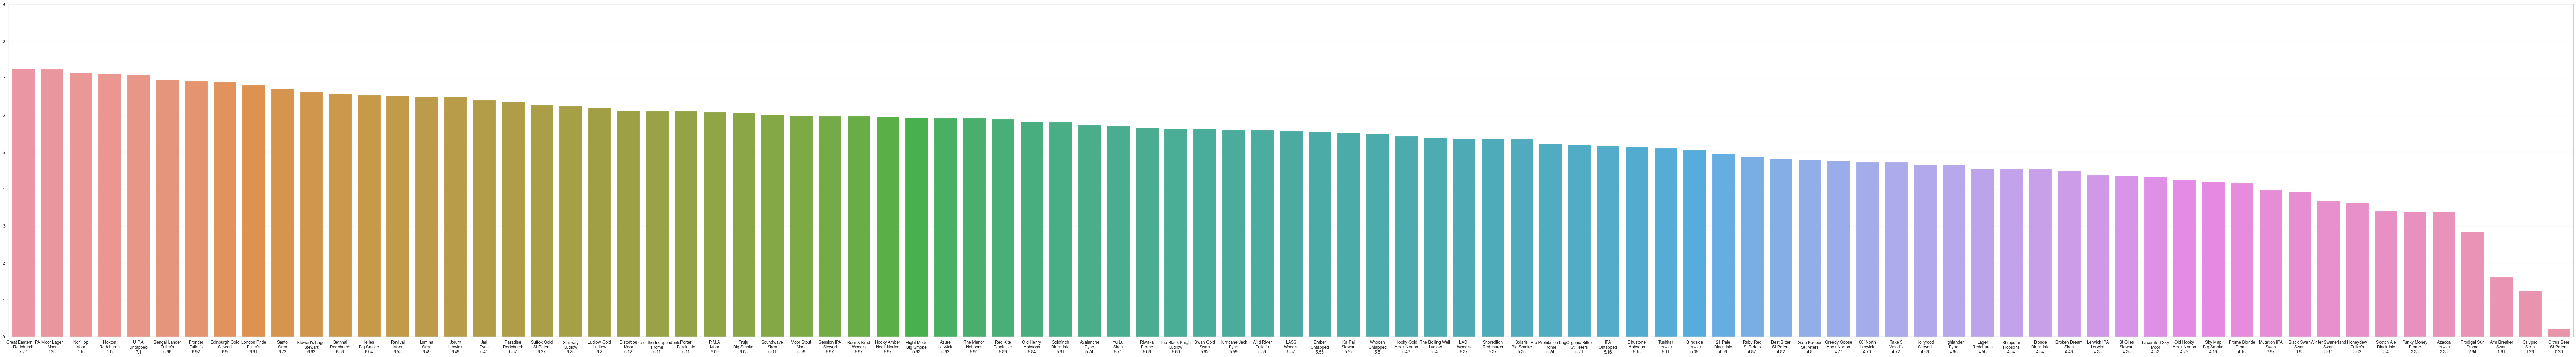

In [16]:
plt.figure(figsize=(120, 16), dpi=80)
plt.ylim(0, 9)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))

In [17]:
dictionary = {}
for i, b in enumerate(df['Brewery'].unique()):
    key = str(b) + ' - ' + str(round(np.mean(df.loc[df['Brewery'] == b]['Average']), 2))
    dictionary[key] = np.mean(df.loc[df['Brewery'] == b]['Average'])
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

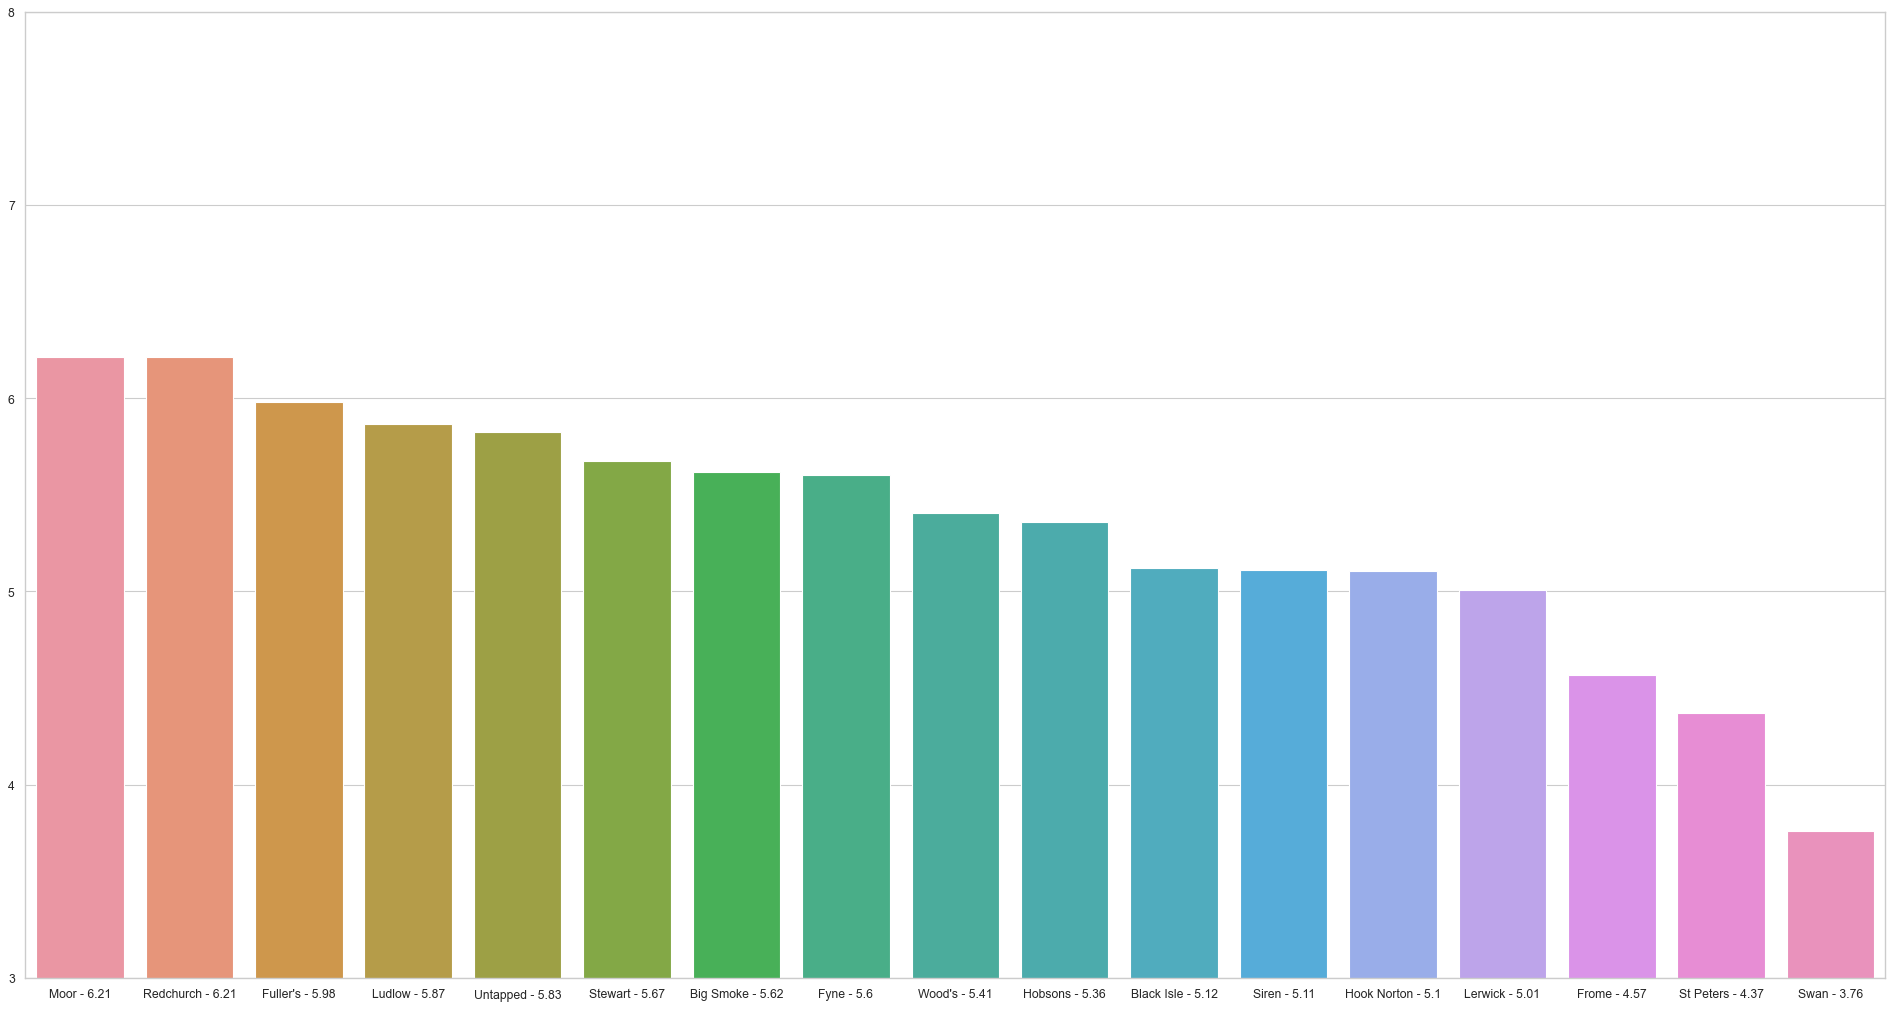

In [18]:
plt.figure(figsize=(30, 16), dpi=80)
plt.ylim(3, 8)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))

In [19]:
dictionary = {}
for i, b in enumerate(df['Style'].unique()):
    key = str(b) + ' - ' + str(round(np.mean(df.loc[df['Style'] == b]['Average']), 2))
    dictionary[key] = np.mean(df.loc[df['Style'] == b]['Average'])
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

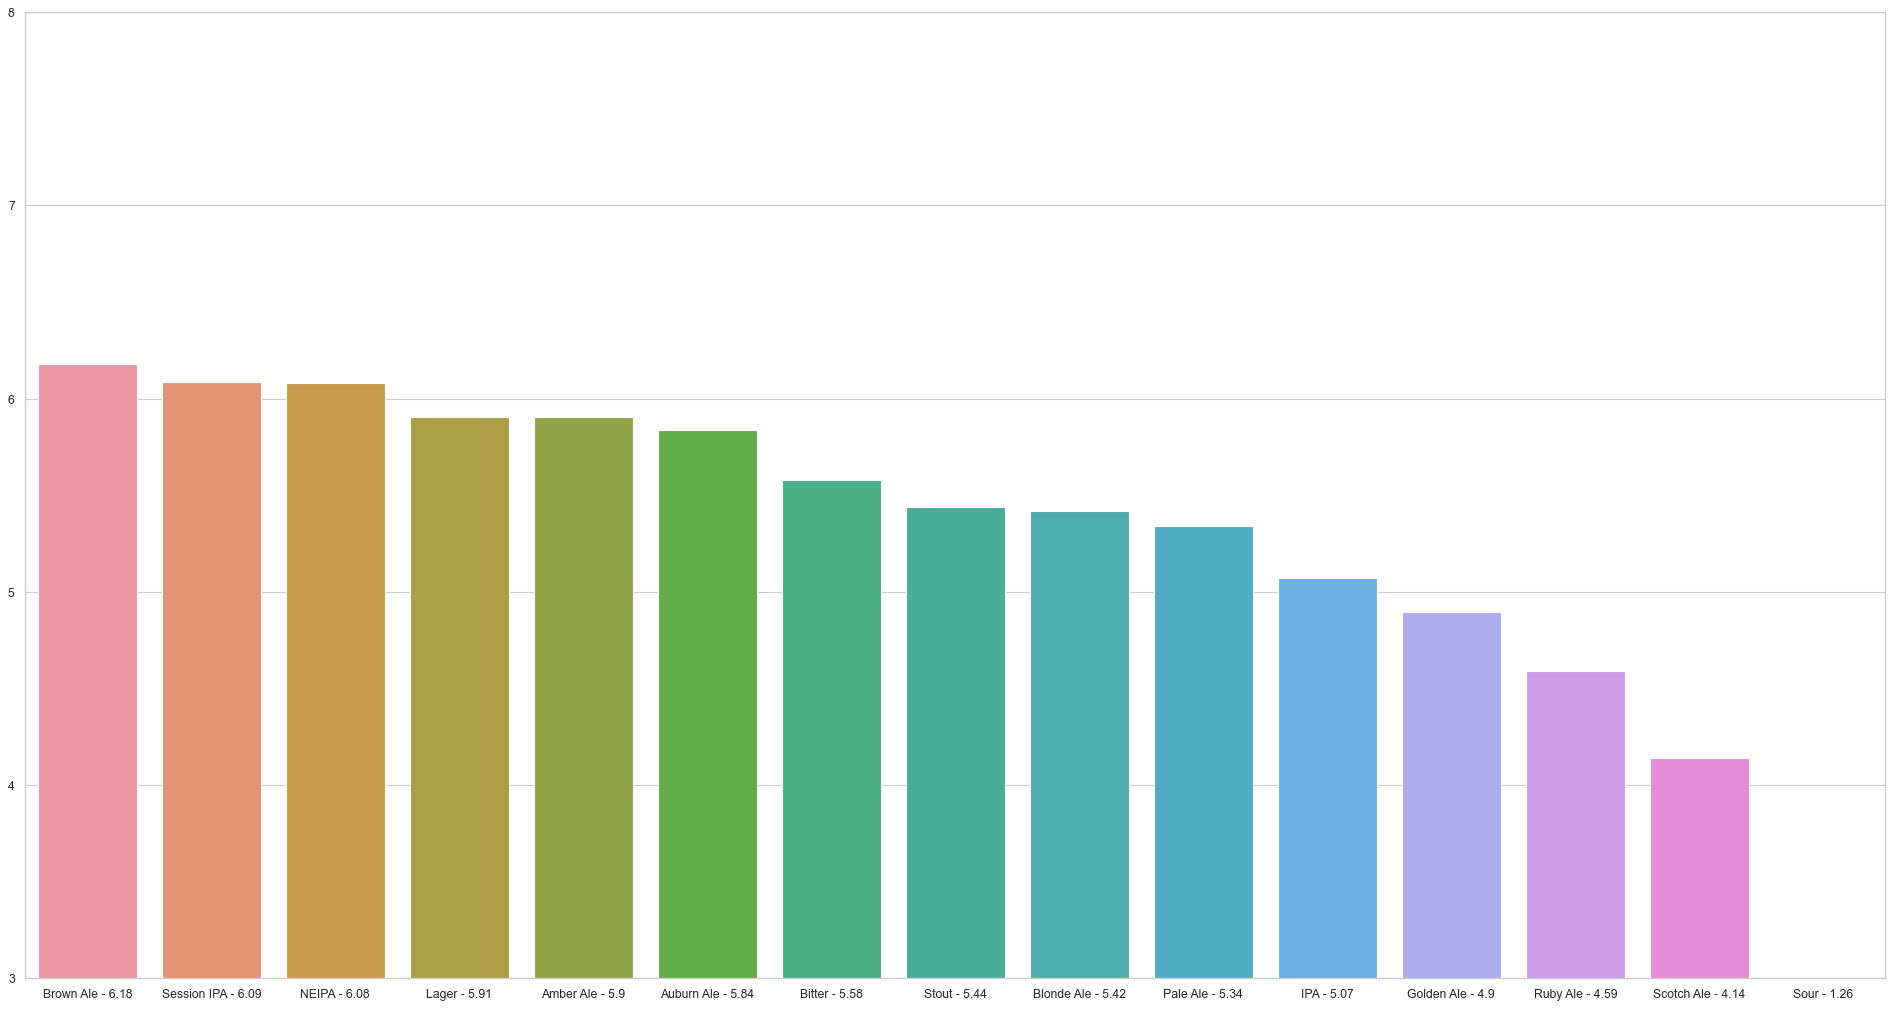

In [20]:
plt.figure(figsize=(30, 16), dpi=80)
plt.ylim(3, 8)
ax = sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))